In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

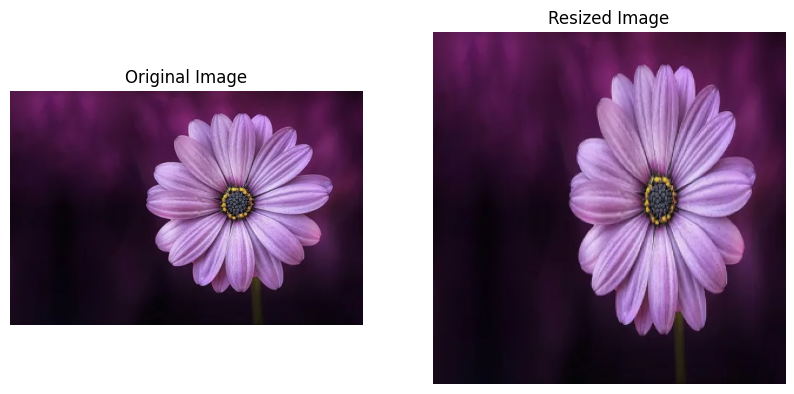

In [2]:
# Чтение изображения
im = cv2.imread(r'/content/OpenCV/flower.png')
im_resized = cv2.resize(im, (300, 300))

# Поскольку OpenCV загружает изображения в формате BGR, преобразуем его в RGB
im_rgb = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
im_resized_rgb = cv2.cvtColor(im_resized, cv2.COLOR_BGR2RGB)

# Отображение изображений
plt.figure(figsize=(10, 5))

# Оригинальное изображение
plt.subplot(1, 2, 1)
plt.imshow(im_rgb)
plt.title('Original Image')
plt.axis('off')

# Измененное изображение
plt.subplot(1, 2, 2)
plt.imshow(im_resized_rgb)
plt.title('Resized Image')
plt.axis('off')

plt.show()

In [3]:
# Получаем размеры
im_height = im.shape[0]
im_width = im.shape[1]
im_channels = im.shape[2]

print(f"Height: {im_height}, Width: {im_width}, Channels: {im_channels}")

Height: 318, Width: 480, Channels: 3


Открыть группу изображений (прочитать список из файла) и составить из них атлас
(все изображения приводятся к одинаковому размеру и собираются в одно;

a. Упорядочить изображения по средней яркости – более темные внизу атласа,
светлые наверху (либо по наличию какого-либо определенного оттенка в
изображениях)

b. Не приводить изображения к общему размеру, а разместить оптимальным
образом, минимизируя просветы между ними

In [4]:
from google.colab import files
uploaded = files.upload()
image_paths = list(uploaded.keys())

Saving cat.png to cat (1).png
Saving dog.png to dog.png
Saving flower1.png to flower1 (4).png
Saving flower2.png to flower2 (5).png
Saving flower3.png to flower3 (5).png
Saving flower4.png to flower4 (5).png
Saving flower5.png to flower5 (5).png
Saving flower6.png to flower6 (3).png
Saving flower7.png to flower7 (3).png


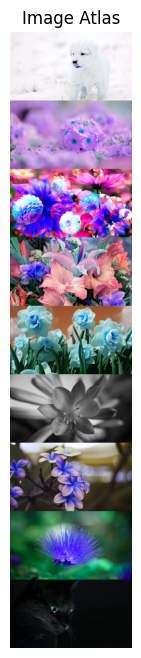

True

In [5]:
def calculate_average_brightness(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) # делаем изображение более простым для обработки, избавляясь от цветовой информации
    return np.mean(gray) # среднее значение всех пикселей. Чем больше значение, тем светлее изображение

def create_atlas(images, atlas_width):
    max_height = max(image.shape[0] for image in images) # для создания одной строки в атласе
    total_height = 0
    row_images = []
    current_width = 0

    # Создаем пустой атлас
    atlas = np.zeros((max_height * len(images), atlas_width, 3), dtype=np.uint8) # RGB

    for img in images:
        h, w = img.shape[:2] # размеры текущего изображения
        if current_width + w > atlas_width: # если изображение не помещается, то перекидываем на новую строку и обновляем высоту
            total_height += max_height
            current_width = 0

        atlas[total_height:total_height + h, current_width:current_width + w] = img
        current_width += w

    return atlas[:total_height + max_height, :current_width]

def build_atlas(atlas):
  plt.figure(figsize=(12, 8))
  plt.imshow(atlas)
  plt.axis('off')
  plt.title('Image Atlas')
  plt.show()

def reading_images():  # Считываем изображения и вычисляем их яркость
  images = []
  for path in image_paths:
    img = cv2.imread(path)
    if img is not None: # на всякий случай)
        images.append(img)
  return images

images = reading_images()

# Упорядочиваем изображения по средней яркости
images.sort(key=lambda x: calculate_average_brightness(x), reverse=True) # Сортировка: светлые сверху, темные снизу

# Создаем атлас
atlas_width = 1366
atlas = create_atlas(images, atlas_width)
build_atlas(atlas)


cv2.imwrite('atlas.jpg', atlas)


In [6]:
def short_handler(func):
  images = reading_images()
  images.sort(key=lambda x: func(x), reverse=True)
  build_atlas(create_atlas(images, 1366))

def calculate_average_brightness_yuv(image):
    yuv = cv2.cvtColor(image, cv2.COLOR_BGR2YUV)
    return np.mean(yuv[:, :, 0])  # Используем только Y-канал для яркости

def calculate_histogram_brightness(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    hist = cv2.calcHist([gray], [0], None, [256], [0, 256]) # Взять среднее значение от гистограммы для определения яркости
    return np.sum(hist * np.arange(256)) / np.sum(hist)



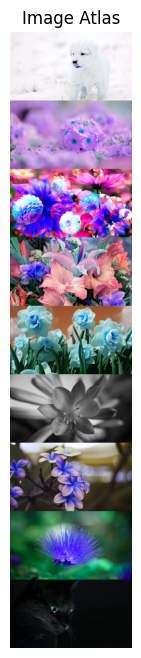

In [7]:
short_handler(calculate_average_brightness_yuv)

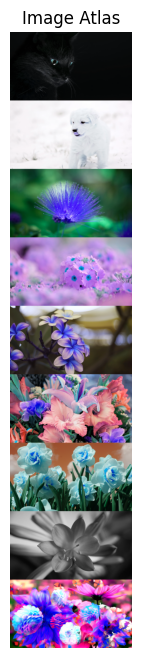

In [8]:
short_handler(calculate_histogram_brightness) # работает плохо как видно